In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set the seed for reproducibility
np.random.seed(42)

# Generate random data for the inner circle
inner_points = 100
inner_radius = 0.2
inner_angles = np.random.uniform(0, 2 * np.pi, inner_points)
inner_x = inner_radius * np.cos(inner_angles) + np.random.normal(0, 0.2, inner_points)
inner_y = inner_radius * np.sin(inner_angles) + np.random.normal(0, 0.2, inner_points)
# Generate random data for the outer circle
outer_points = 600
outer_radius = 1
outer_angles = np.random.uniform(0, 2 * np.pi, outer_points)
outer_x = outer_radius * np.cos(outer_angles) + np.random.normal(0, 0.15, outer_points)
outer_y = outer_radius * np.sin(outer_angles) + np.random.normal(0, 0.15, outer_points)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


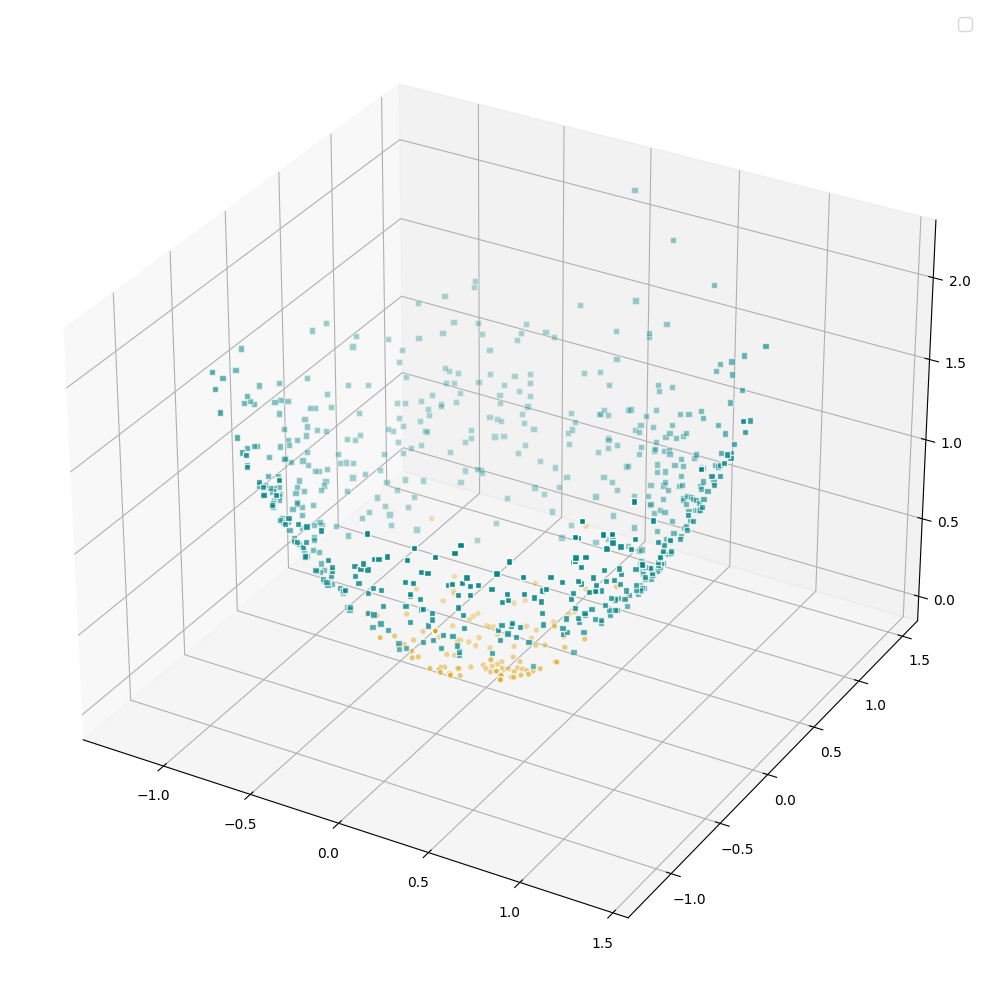

In [2]:
import numpy as np
import matplotlib.pyplot as plt


inner_z = inner_x**2 + inner_y**2
# Generate random data for the outer circle

outer_z = outer_x**2 + outer_y**2

# Create a scatter plot with custom colors and markers
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(inner_x, inner_y, inner_z, label='', marker='o', c='goldenrod', edgecolors='white', linewidths=1)
ax.scatter(outer_x, outer_y, outer_z, label='', marker='s', c='teal', edgecolors='white', linewidths=1)

# Customize plot appearance
# ax.set_title('', fontsize=20, fontweight='bold', color='darkblue')
# ax.set_xlabel('X-axis', fontsize=16, fontweight='bold', color='darkblue')
# ax.set_ylabel('Y-axis', fontsize=16, fontweight='bold', color='darkblue')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


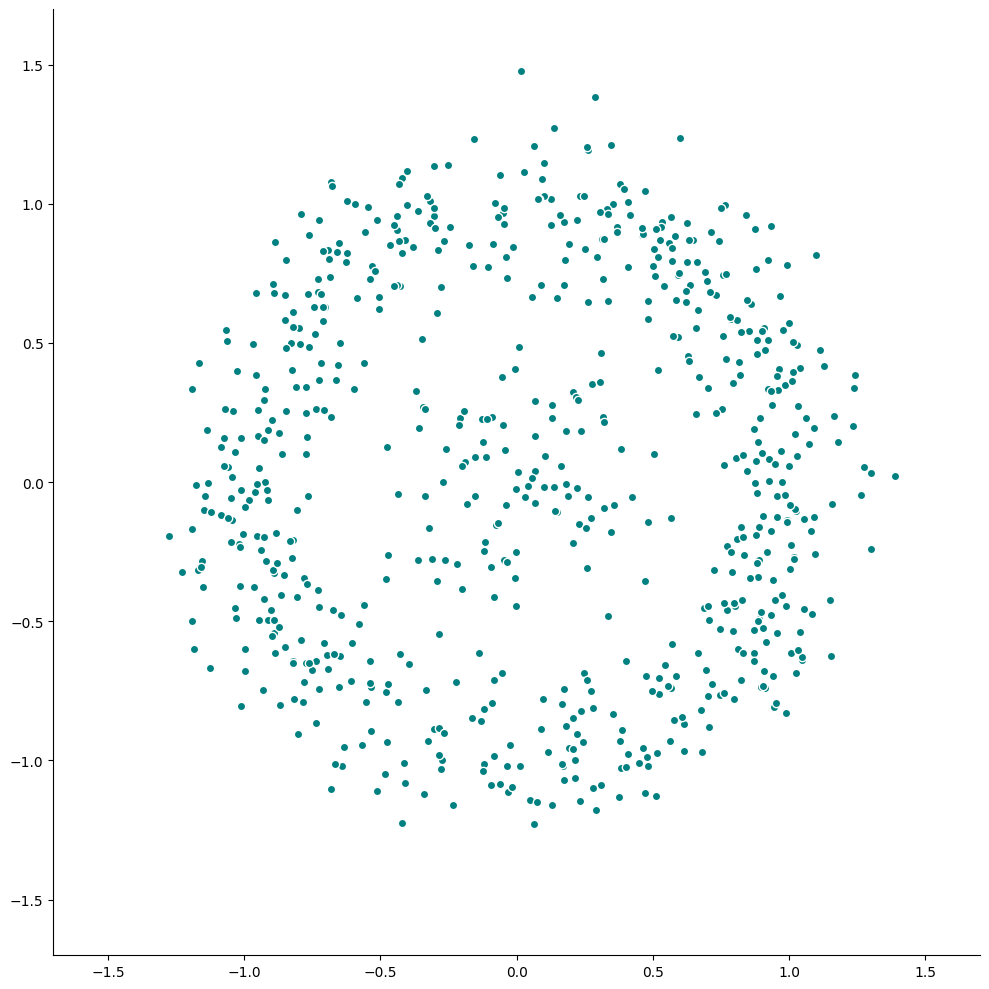

In [3]:


# Create a scatter plot with custom colors and markers

fig, ax = plt.subplots(figsize=(10, 10))
# ax = fig.add_subplot(projection='3d')
# set x_max and min

ax.scatter(inner_x, inner_y, label='', marker='o', c='teal', edgecolors='white', linewidths=1)
# ax.scatter(inner_x, inner_y, label='', marker='o', c='goldenrod', edgecolors='white', linewidths=0.3)
ax.scatter(outer_x, outer_y, label='', marker='o', c='teal', edgecolors='white', linewidths=1)

ax.set_xlim(-1.7, 1.7)
ax.set_ylim(-1.7, 1.7)
# Customize plot appearance
# ax.set_title('', fontsize=20, fontweight='bold', color='darkblue')
# ax.set_xlabel('X-axis', fontsize=16, fontweight='bold', color='darkblue')
# ax.set_ylabel('Y-axis', fontsize=16, fontweight='bold', color='darkblue')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


In [4]:
from sklearn.svm import SVC

In [5]:
# make a point coordinate using inner_x, inner_y, outer_x, outer_y
X = np.concatenate((np.array([inner_x, inner_y]).T, np.array([outer_x, outer_y]).T))
# make label using inner_x, inner_y, outer_x, outer_y
y = np.concatenate((np.zeros(inner_x.shape), np.ones(outer_x.shape)))

In [6]:
clf = SVC(kernel='rbf', C=1)
clf.fit(X, y)

SVC(C=1)

In [7]:
trs = 0.15
x_min, x_max = -1.7, 1.7
y_min, y_max = -1.7, 1.7
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

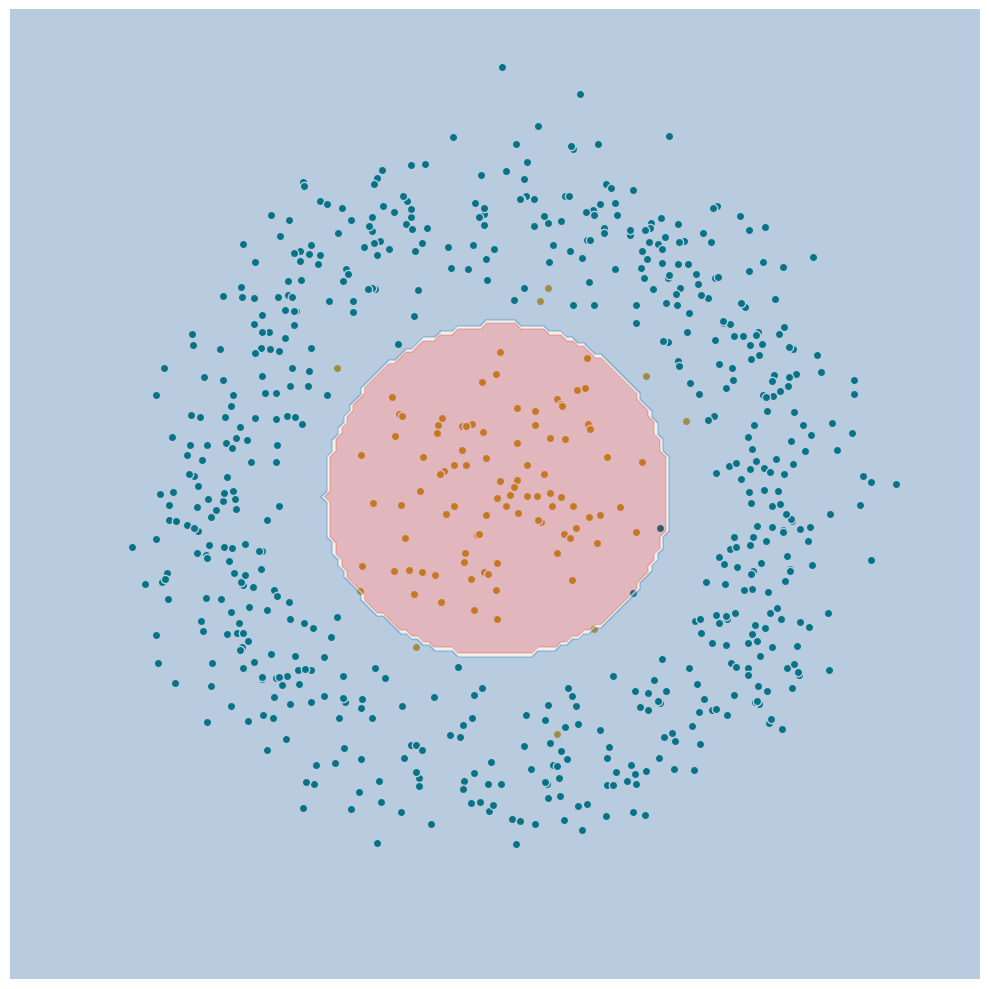

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
# ax = fig.add_subplot(projection='3d')
ax.scatter(inner_x, inner_y, label='', marker='o', c='goldenrod', edgecolors='white', linewidths=1)
ax.scatter(outer_x, outer_y, label='', marker='o', c='teal', edgecolors='white', linewidths=1)
colors = ['white', 'red']
# set clear color
ax.set_facecolor('white')
ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

# ax.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

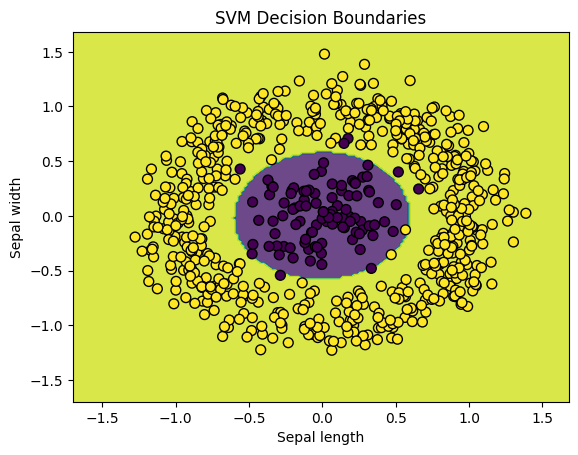

In [9]:
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundaries')
plt.show()

In [10]:
from sklearn.cluster import SpectralClustering

In [11]:
len(X)

700

In [15]:
clustering = SpectralClustering(n_clusters=2, gamma=200.0).fit(X)

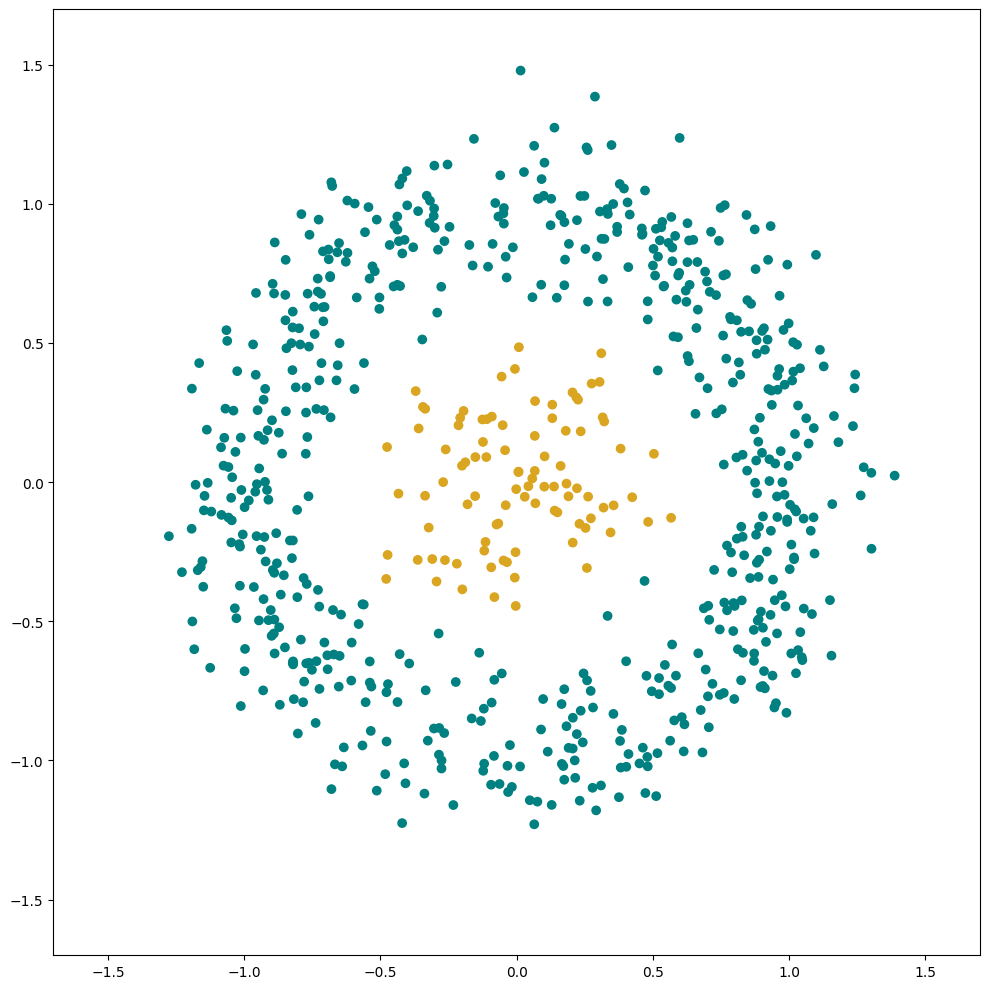

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
# ax = fig.add_subplot(projection='3d')
# set custom color for each cluster label
clustering.fit_predict(X)
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
# Z = Z.reshape(xx.shape)
# ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')

colors = [('goldenrod' if i==1 else 'teal') for i in clustering.labels_]
plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.xlim(-1.7, 1.7)
plt.ylim(-1.7, 1.7)

# ax.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
clf = SVC(kernel='rbf', C=1)
clf.fit(X, clustering.labels_)

SVC(C=1)

In [20]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

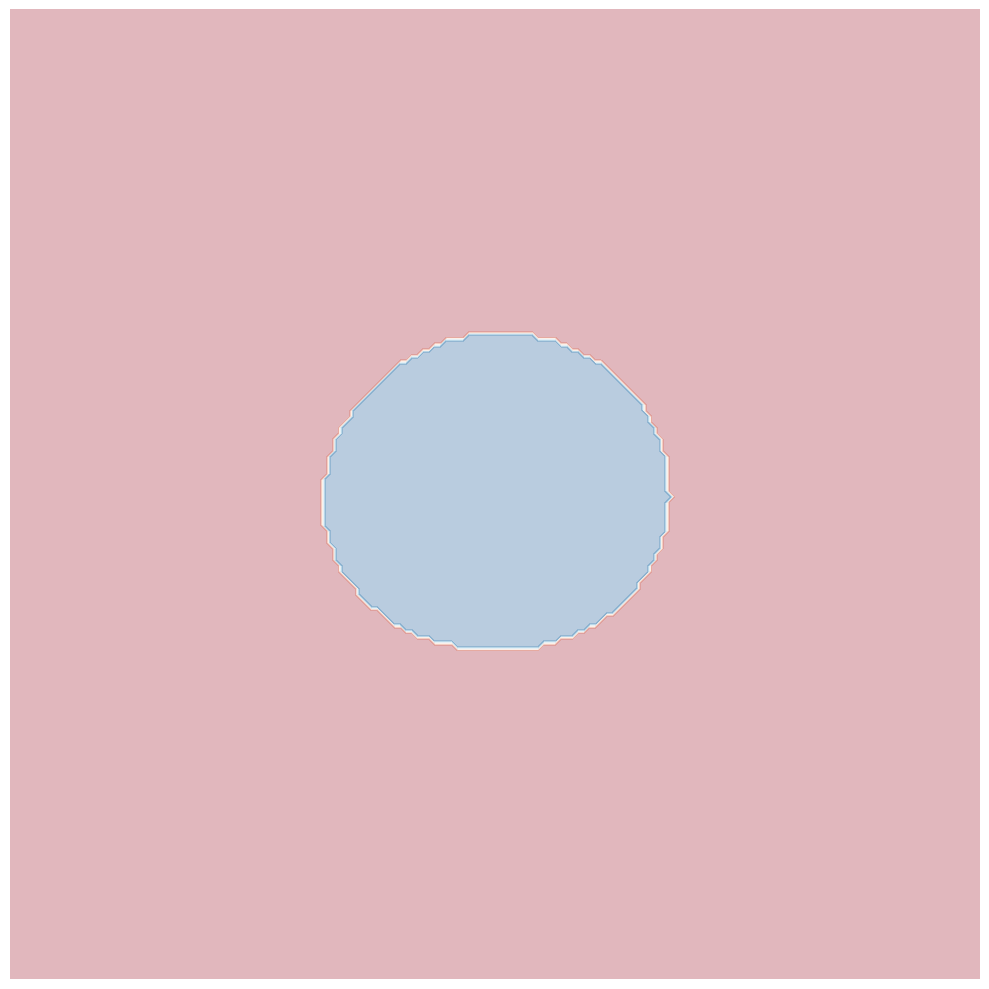

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))
# ax = fig.add_subplot(projection='3d')
# ax.scatter(inner_x, inner_y, label='', marker='o', c='goldenrod', edgecolors='white', linewidths=1)
# ax.scatter(outer_x, outer_y, label='', marker='o', c='teal', edgecolors='white', linewidths=1)
colors = ['white', 'red']
# set clear color
ax.set_facecolor('white')
ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

# ax.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

In [108]:
import numpy as np
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Create two linearly separable imbalanced datasets
data2 = make_classification(n_classes=2, class_sep=2, weights=[0.05, 0.95], n_informative=2, n_redundant=0, flip_y=0, n_features=2, n_clusters_per_class=1, n_samples=1000, random_state=20)

datasets = [data2]

# Apply SMOTE to balance the datasets
smote = SMOTE(random_state=42)

for i, (X, y) in enumerate(datasets):
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    # Plot original and resampled datasets
    plt.figure(figsize=(12, 5))
    
    plt.subplot(121)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0")
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1")
    plt.title(f"Original Dataset {i + 1}")
    plt.legend()

    plt.subplot(122)
    plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], label="Class 0")
    plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], label="Class 1")
    plt.title(f"Resampled Dataset {i + 1} (with SMOTE)")
    plt.legend()

    # plt.show()
    plt.close()


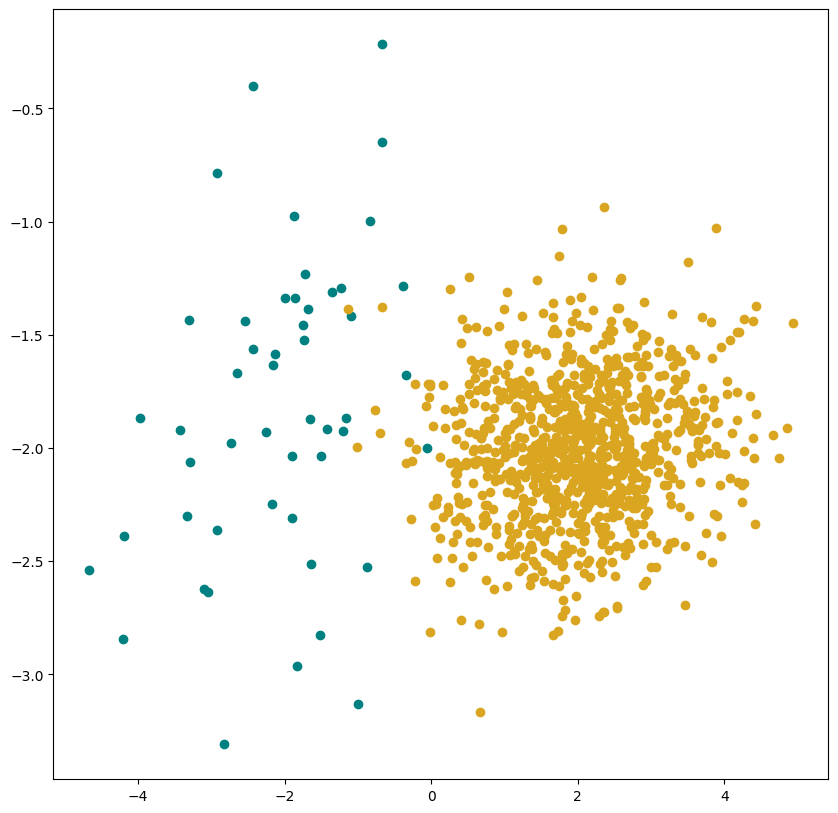

In [109]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", c='teal')
ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", c='goldenrod')
# ax.legend()

plt.show()

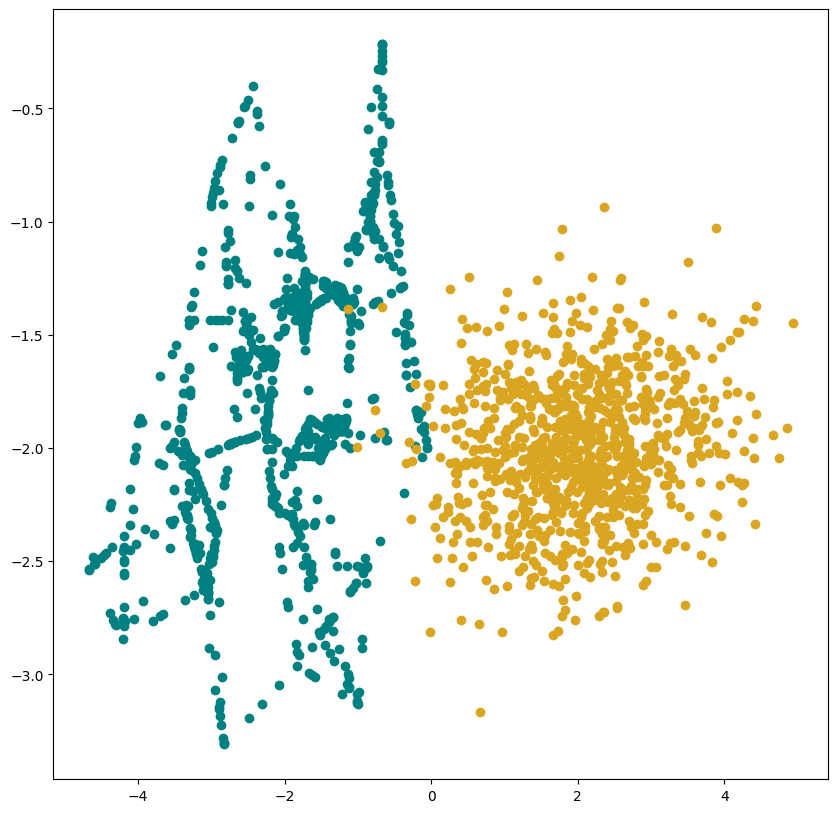

In [110]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], label="Class 0", c='teal')
ax.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], label="Class 1", c='goldenrod')
# ax.legend()

plt.show()

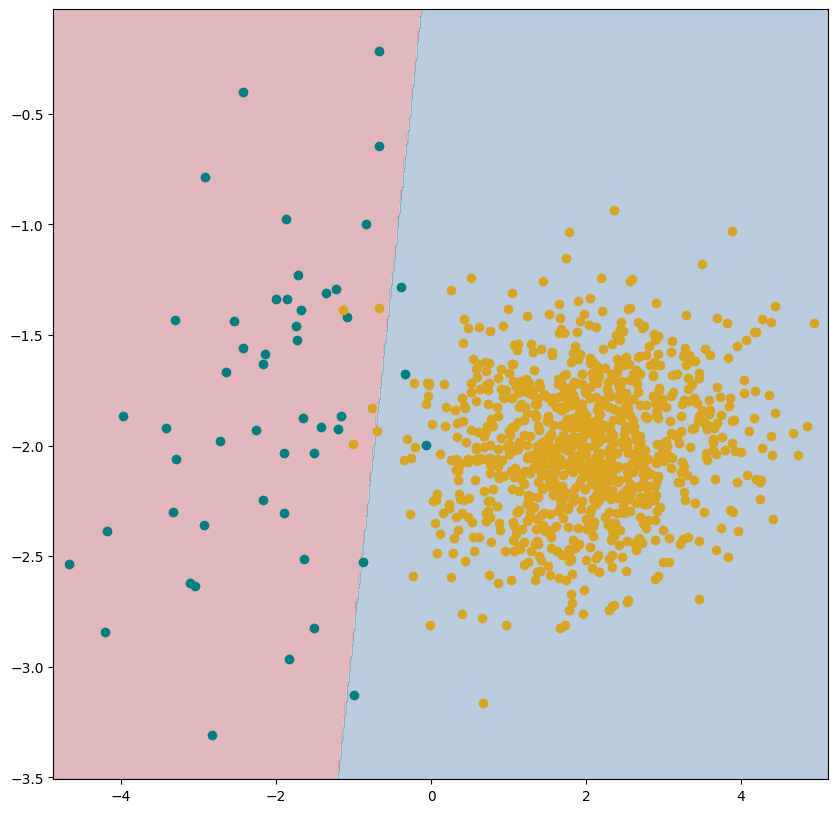

In [111]:
clf = SVC(kernel='linear', C=2)
clf.fit(X, y)

x_min = X[:, 0].min() - 0.2
x_max = X[:, 0].max() + 0.2
y_min = X[:, 1].min() - 0.2
y_max = X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10, 10))
# ax = fig.add_subplot(projection='3d')
colors = ['white', 'red']
# set clear color
# ax.set_facecolor('white')
ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')
ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1],c='teal')
ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='goldenrod')

plt.show()

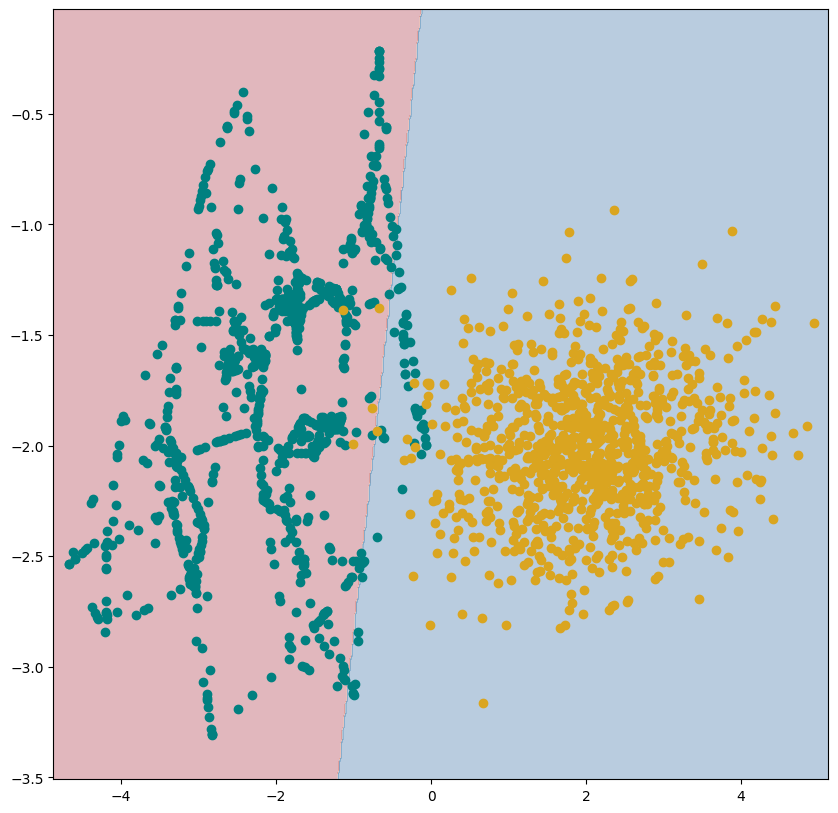

In [112]:
clf = SVC(kernel='linear', C=2)
clf.fit(X, y)

x_min = X[:, 0].min() - 0.2
x_max = X[:, 0].max() + 0.2
y_min = X[:, 1].min() - 0.2
y_max = X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10, 10))
# ax = fig.add_subplot(projection='3d')
colors = ['white', 'red']
# set clear color
# ax.set_facecolor('white')

ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')
ax.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], label="Class 0", c='teal')
ax.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], label="Class 1", c='goldenrod')

plt.show()

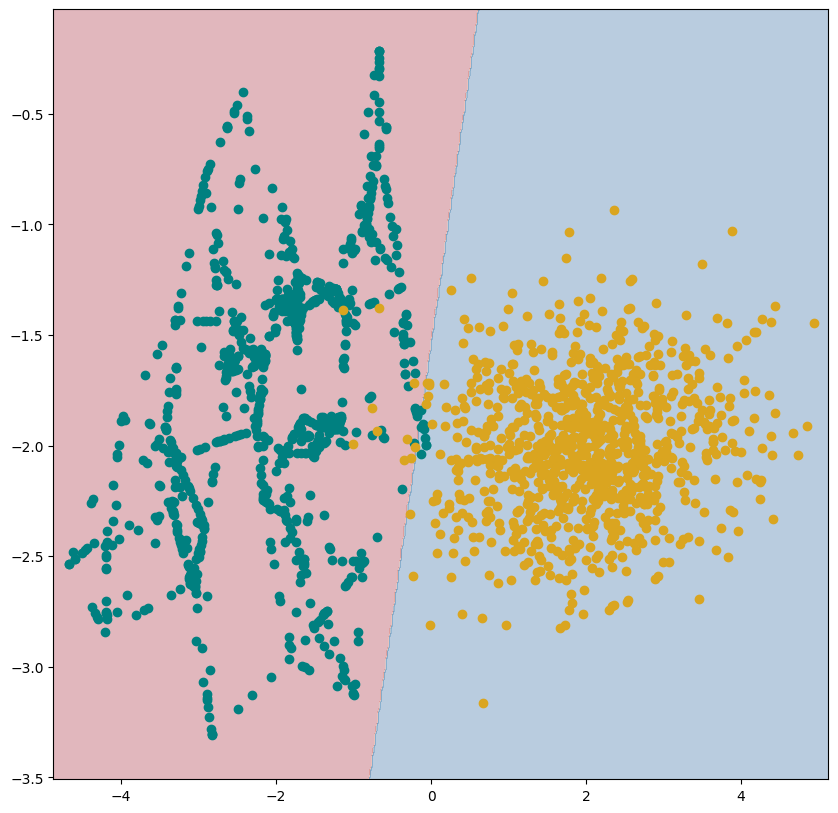

In [113]:
clf = SVC(kernel='linear', C=2)
clf.fit(X_resampled, y_resampled)

x_min = X[:, 0].min() - 0.2
x_max = X[:, 0].max() + 0.2
y_min = X[:, 1].min() - 0.2
y_max = X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10, 10))
# ax = fig.add_subplot(projection='3d')
colors = ['white', 'red']
# set clear color
# ax.set_facecolor('white')

ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')
ax.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], label="Class 0", c='teal')
ax.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], label="Class 1", c='goldenrod')

plt.show()

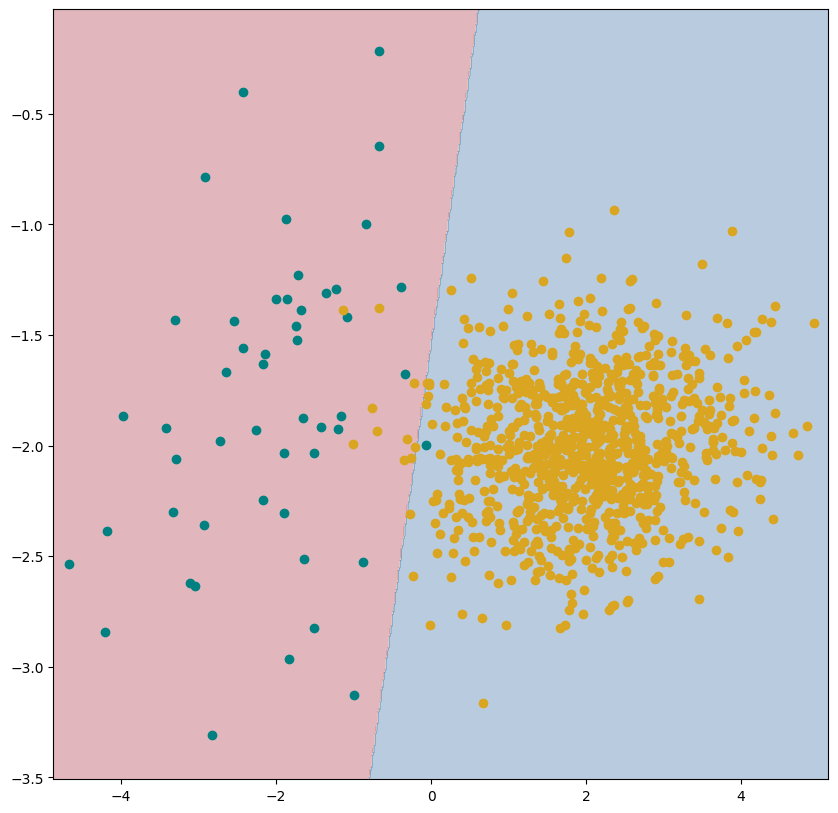

In [114]:
clf = SVC(kernel='linear', C=2)
clf.fit(X_resampled, y_resampled)

x_min = X[:, 0].min() - 0.2
x_max = X[:, 0].max() + 0.2
y_min = X[:, 1].min() - 0.2
y_max = X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10, 10))
# ax = fig.add_subplot(projection='3d')
colors = ['white', 'red']
# set clear color
# ax.set_facecolor('white')

ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')
ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1],c='teal')
ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='goldenrod')

plt.show()

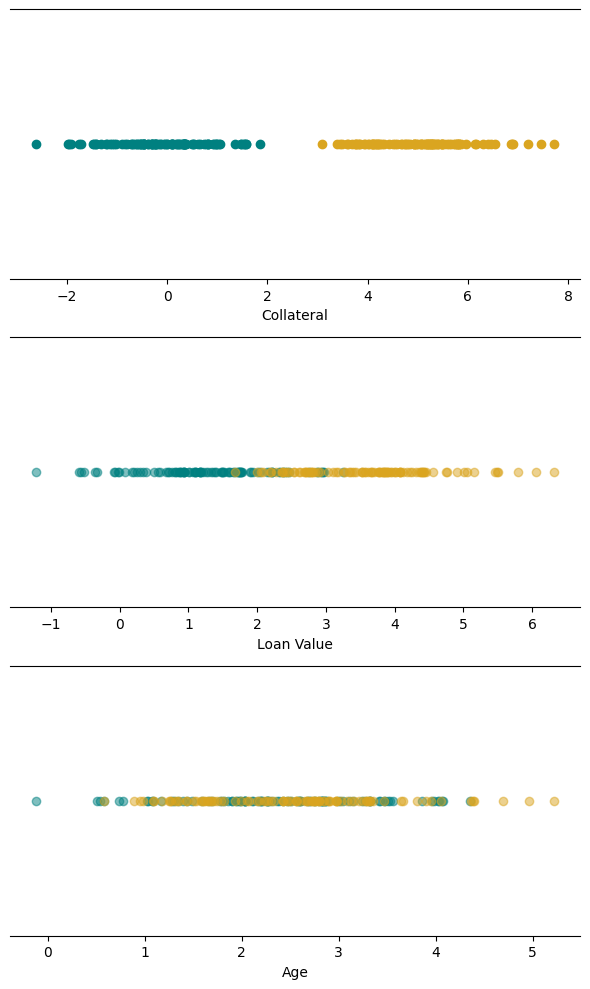

In [159]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate data for two classes
class_0 = np.random.normal(loc=0, scale=1, size=100)
class_1 = np.random.normal(loc=5, scale=1, size=100)

# Feature with high discriminative power
feature_high = np.concatenate((class_0, class_1))

# Feature with low discriminative power
feature_low = np.concatenate((class_0 + 4, class_1 - 4))

# Labels for the two classes
labels = np.array([0] * 100 + [1] * 100)

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(6, 10))

axes[0].scatter(class_0, y=np.zeros(len(class_0)), c='teal')
axes[0].scatter(class_1, y=np.zeros(len(class_1)), c='goldenrod')
axes[0].set_xlabel("Collateral")
axes[0].spines['left'].set_visible(False)
# axes[0].spines['bottom'].set_visible(False)
axes[0].spines['right'].set_visible(False)
# axes[0].spines['top'].set_visible(False)
axes[0].yaxis.set_ticks([])
# axes[0].xaxis.set_ticks([])

axes[1].scatter(class_0+ 1.4, y=np.zeros(len(class_0)), c='teal', alpha=0.5)
axes[1].scatter(class_1-1.4, y=np.zeros(len(class_1)), c='goldenrod', alpha=0.5)
axes[1].set_xlabel("Loan Value")
axes[1].spines['left'].set_visible(False)
# axes[1].spines['bottom'].set_visible(False)
axes[1].spines['right'].set_visible(False)
# axes[1].spines['top'].set_visible(False)
axes[1].yaxis.set_ticks([])
# axes[1].xaxis.set_ticks([])

axes[2].scatter(class_0 + 2.5, y=np.zeros(len(class_0)), c='teal', alpha=0.5)
axes[2].scatter(class_1 - 2.5, y=np.zeros(len(class_1)), c='goldenrod', alpha=0.5)
axes[2].set_xlabel("Age")
axes[2].spines['left'].set_visible(False)
# axes[2].spines['bottom'].set_visible(False)
axes[2].spines['right'].set_visible(False)
# axes[2].spines['top'].set_visible(False)
axes[2].yaxis.set_ticks([])
# axes[2].xaxis.set_ticks([])
# axes[0].set_xlabel("Feature Value")
# axes[0].set_ylabel("")
# axes[0].legend()

# axes[1].scatter(feature_low, labels, label="Low Discriminative Power", color="orange")
# axes[1].set_xlabel("Feature Value")
# axes[1].set_ylabel("Class Label")
# axes[1].legend()

plt.tight_layout()
plt.show()


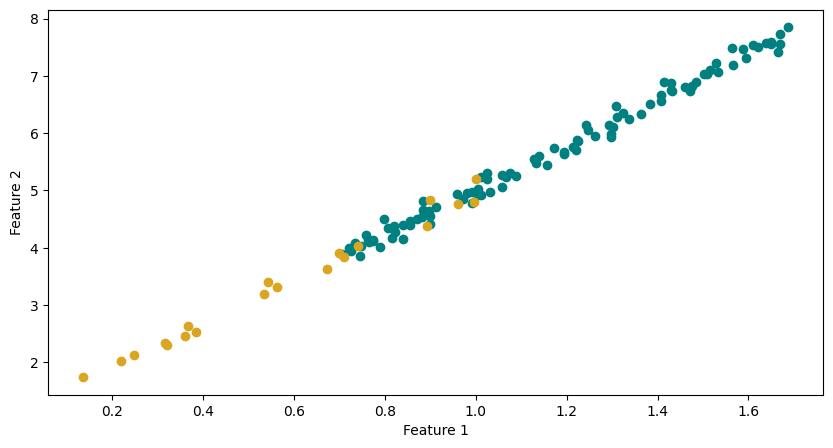

In [182]:
import numpy as np
import matplotlib.pyplot as plt

# Generate linearly scattered data
def generate_data(n_samples, slope, intercept, noise_stddev, start=0, seed=None):
    if seed:
        np.random.seed(seed)
    x = np.random.rand(n_samples) + start
    noise = np.random.normal(start, noise_stddev, n_samples)
    y = slope * x + intercept + noise - start
    return np.column_stack((x, y))

# Number of samples for each class
n_samples = 100

# Generate class 1 data
class_1_slope = 4
class_1_intercept = 1
class_1_noise_stddev = 0.13
class_1_data = generate_data(n_samples, class_1_slope, class_1_intercept, class_1_noise_stddev, start=0.7, seed=42)

# Generate class 2 data
class_2_slope = 4
class_2_intercept = 1
class_2_noise_stddev = 0.14
class_2_data = generate_data(20, class_2_slope, class_2_intercept, class_2_noise_stddev, seed=24)

plt.figure(figsize=(10, 5))
# Plot the data
plt.scatter(class_1_data[:, 0], class_1_data[:, 1], c='teal', label='Class 1')
plt.scatter(class_2_data[:, 0], class_2_data[:, 1], c='goldenrod', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# plt.legend()
# plt.title('Linearly Scattered Two-Class Data')
plt.show()


In [188]:
# variance matrix of data
data=np.vstack([class_1_data, class_2_data])
cov_mat = np.cov(data.T)

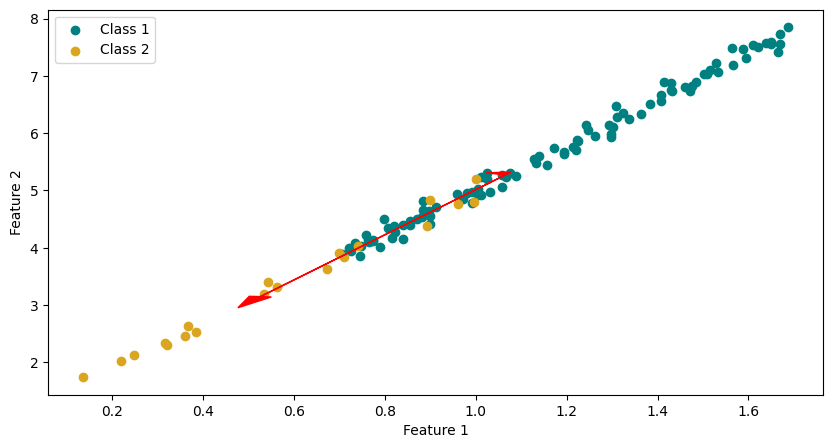

In [212]:
# eigen decomposition of covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# plot eigen values and eigen vectors across data
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(class_1_data[:, 0], class_1_data[:, 1], c='teal', label='Class 1')
ax.scatter(class_2_data[:, 0], class_2_data[:, 1], c='goldenrod', label='Class 2')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.arrow(np.mean(data[:, 0]), np.mean(data[:, 1]), eig_vecs[0, 0] * eig_vals[0], eig_vecs[1, 0] * eig_vals[0], head_width=0.05, head_length=0.05, fc='red', ec='red')
ax.arrow(np.mean(data[:, 0]), np.mean(data[:, 1]), eig_vecs[0, 1] * eig_vals[1], eig_vecs[1, 1] * eig_vals[1], head_width=0.05, head_length=0.2, fc='red', ec='red')
# ax.set_xlim([0, 1.5])
# ax.set_ylim([0, 5])
ax.legend()
plt.show()


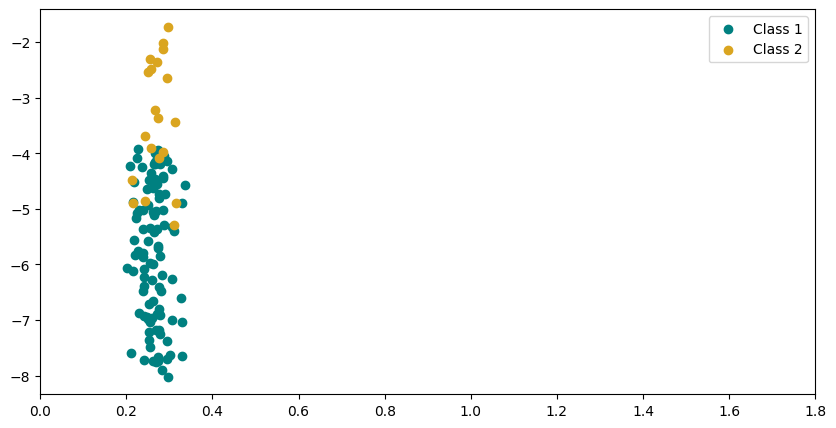

In [218]:
# project data onto eigen vectors
projected_data = np.dot(data, eig_vecs)
# plot projected data
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(projected_data[:n_samples, 0], projected_data[:n_samples, 1], c='teal', label='Class 1')
ax.scatter(projected_data[n_samples:, 0], projected_data[n_samples:, 1], c='goldenrod', label='Class 2')
ax.set_xlim([0, 1.8])
ax.legend()
plt.show()


In [190]:
# find eigen values and eigen vectors
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [221]:
print('Eigenvectors \n%s' %eig_vecs)

print('Eigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.96923714 -0.24612875]
 [ 0.24612875 -0.96923714]]
Eigenvalues 
[8.35383067e-04 2.21680509e+00]


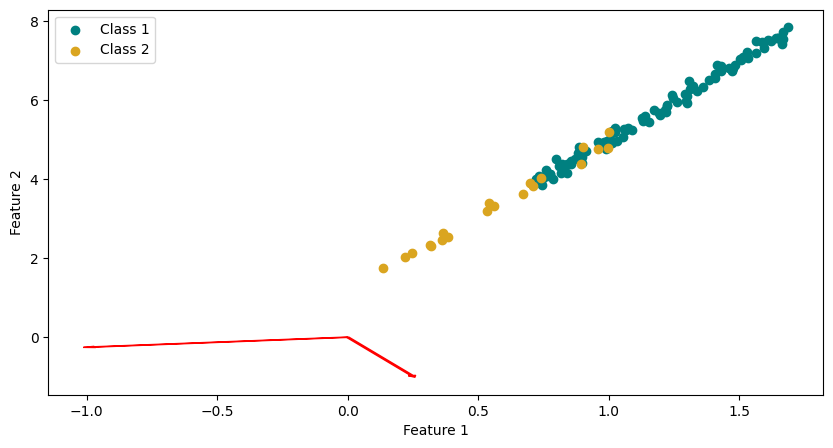

In [215]:
# plot eigen vectors
plt.figure(figsize=(10, 5))
plt.scatter(class_1_data[:, 0], class_1_data[:, 1], c='teal', label='Class 1')
plt.scatter(class_2_data[:, 0], class_2_data[:, 1], c='goldenrod', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.arrow(0, 0, eig_vecs[0, 0], eig_vecs[0, 1], color='red', width=0.01)
plt.arrow(0, 0, eig_vecs[1, 0], eig_vecs[1, 1], color='red', width=0.01)
plt.legend()

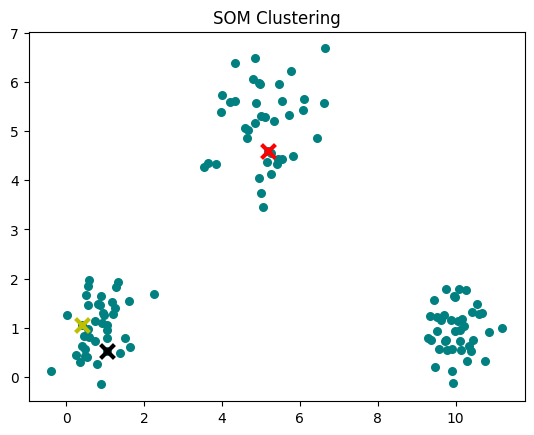

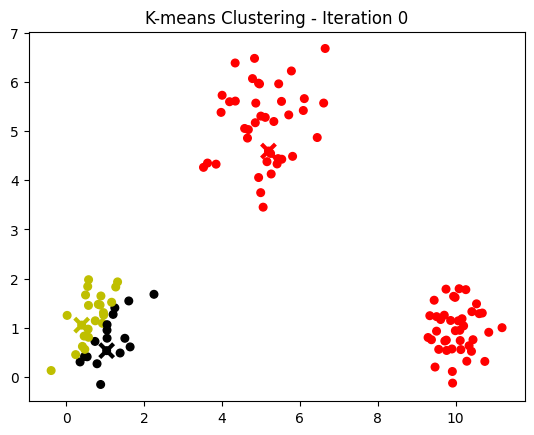

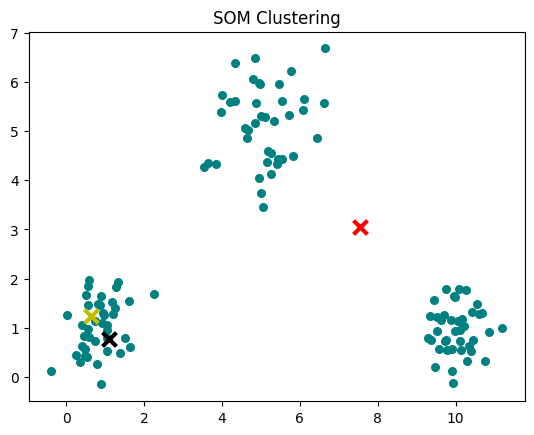

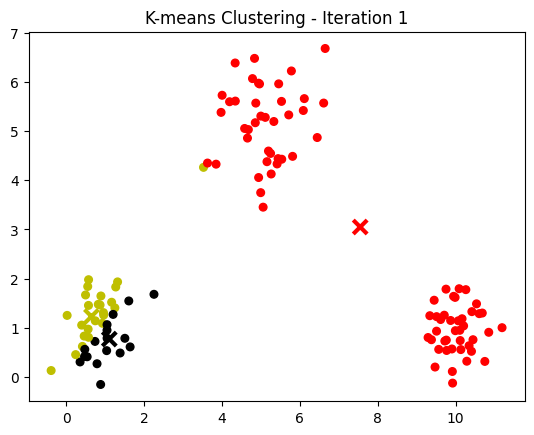

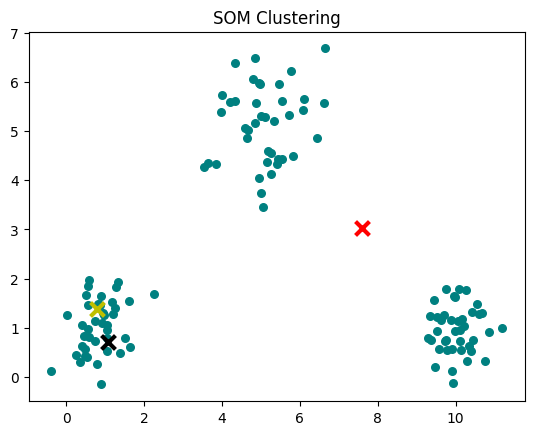

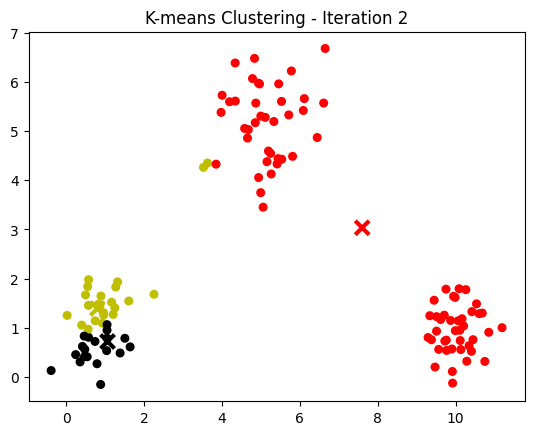

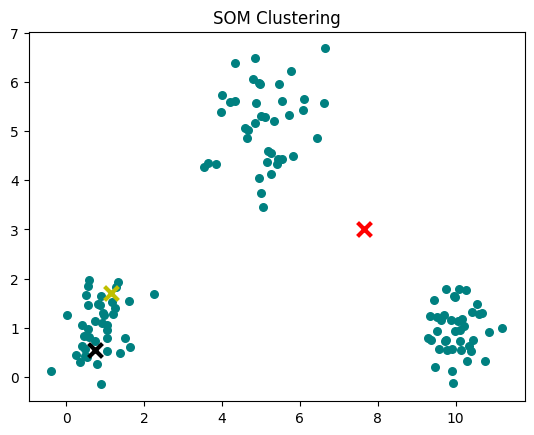

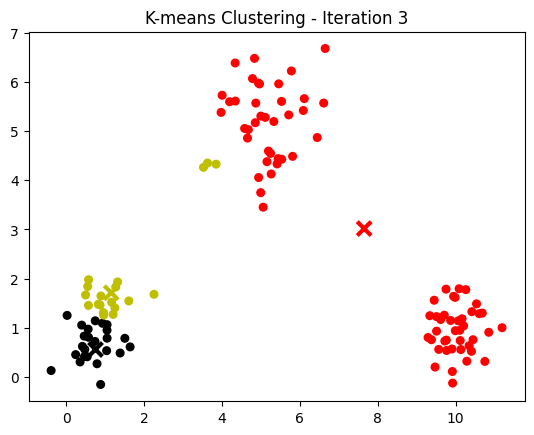

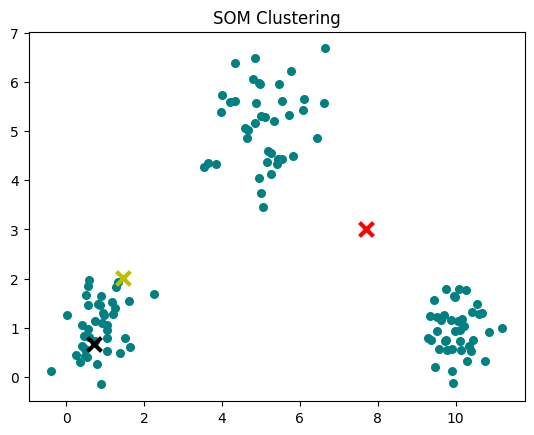

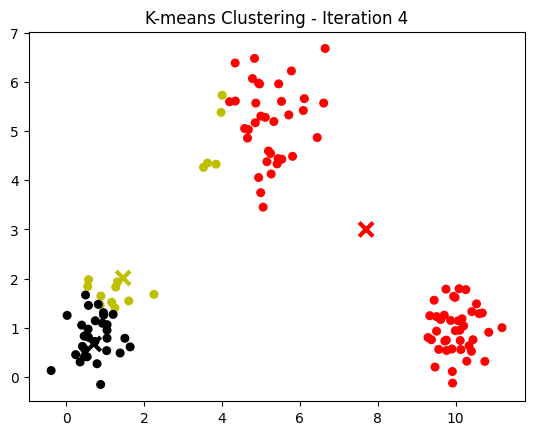

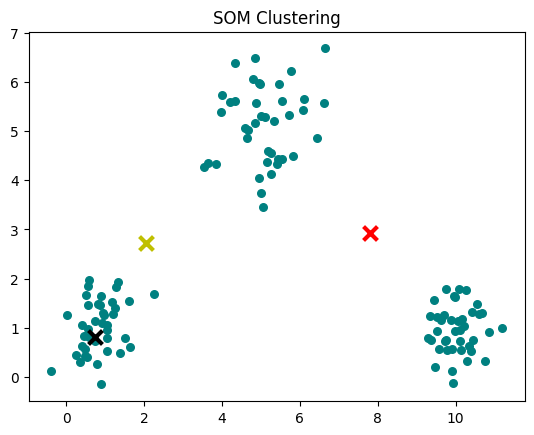

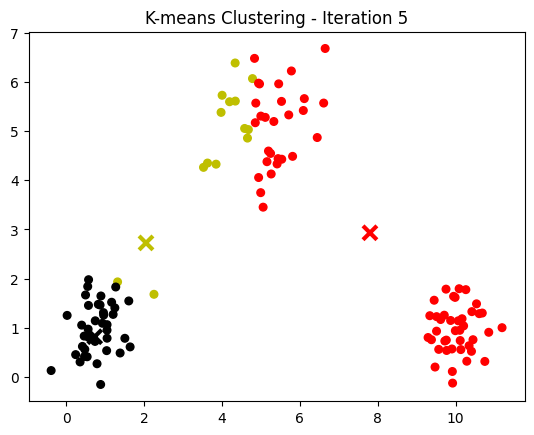

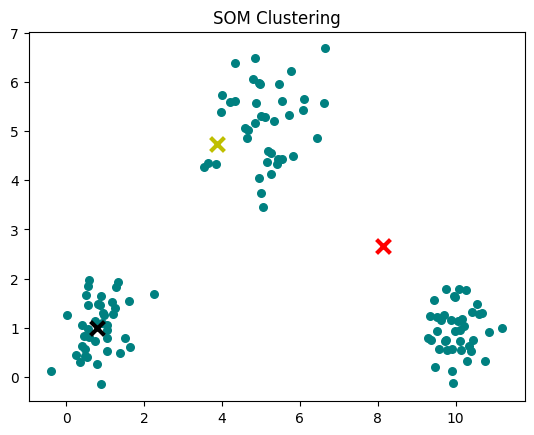

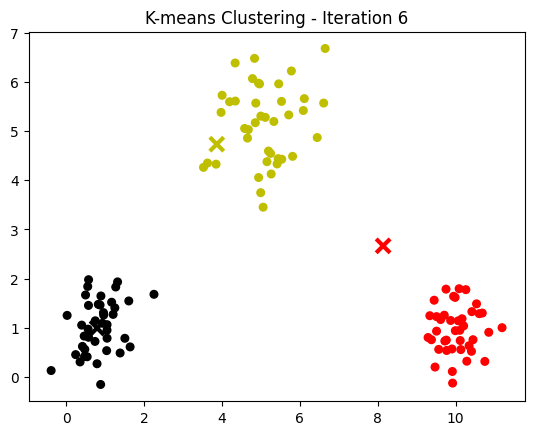

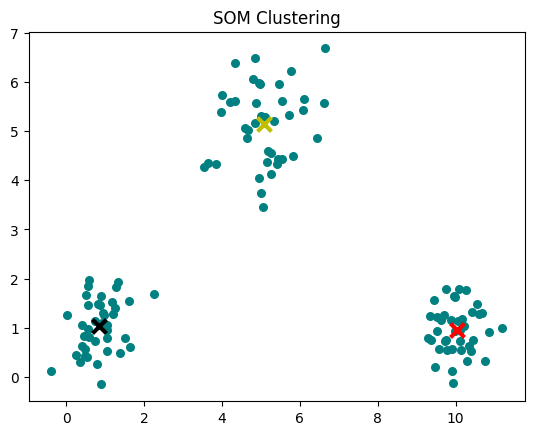

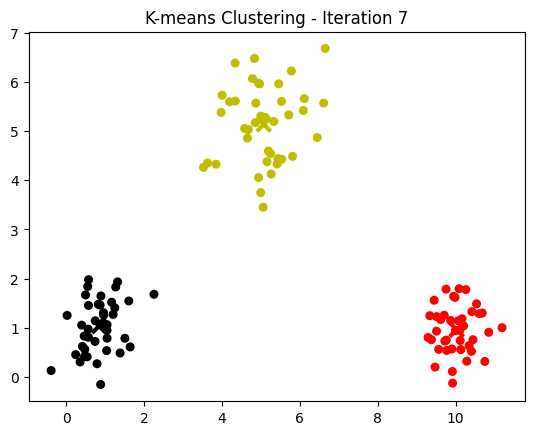

In [18]:
import random
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((np.array(p1) - np.array(p2)) ** 2))

def mean(points):
    return np.mean(points, axis=0)

def assign_points_to_clusters(centroids, points):
    clusters = {i: [] for i in range(len(centroids))}
    for point in points:
        closest_centroid_idx = np.argmin([euclidean_distance(point, centroid) for centroid in centroids])
        clusters[closest_centroid_idx].append(point)
    return clusters

def assign_points_to_clusters2(centroids, points):
    distances = np.array([[euclidean_distance(point, centroid) for centroid in centroids] for point in points])
    return np.argmin(distances, axis=1)

def plot_k_means(points, centroids, clusters, iteration):
    colors = ['y', 'k', 'r', 'c', 'm', 'y', 'k']

    plt.scatter(points[:, 0], points[:, 1], marker='o', s=30, c='teal')
    for centroid, color in zip(centroids, colors[:len(centroids)]):
        plt.scatter(centroid[0], centroid[1], c=color, marker='x', s=100, linewidths=3)

    plt.title(f'SOM Clustering')
    plt.show()

    cluster_indices = assign_points_to_clusters2(centroids, points)
    colors = ['y', 'k', 'r']
    point_colors = [colors[i] for i in cluster_indices]
    plt.scatter(points[:, 0], points[:, 1], c=point_colors, marker='o', s=30)
    plt.scatter(centroids[:, 0], centroids[:, 1], c=colors, marker='x', s=100, linewidths=3)
    plt.title(f'K-means Clustering - Iteration {iteration}')
    plt.show()

def k_means(points, k, max_iterations=100):
    centroids = points[np.random.choice(len(points), k, replace=False)]

    for iteration in range(max_iterations):
        clusters = assign_points_to_clusters(centroids, points)
        plot_k_means(points, centroids, clusters, iteration)

        new_centroids = np.array([mean(cluster) for cluster in clusters.values()])
        
        if np.allclose(centroids, new_centroids, rtol=1e-5):
            break

        centroids = new_centroids

    return centroids, clusters

def generate_cluster(center, std_dev, num_points, noise=0):
    data = np.random.normal(loc=center, scale=std_dev, size=(num_points, 2))
    if noise > 0:
        noise_data = np.random.uniform(low=-noise, high=noise, size=(num_points, 2))
        data += noise_data
    return data

# Example usage
centers = [(1, 1), (5, 5), (10, 1)]
std_devs = [0.5, 0.8, 0.5]
num_points = 40
noise = 0.1

clusters = [generate_cluster(center, std_dev, num_points, noise) for center, std_dev in zip(centers, std_devs)]
points = np.vstack(clusters)
k = 3
centroids, clusters = k_means(points, k)


Text(0.5, 1.0, 'SOM Clustering')

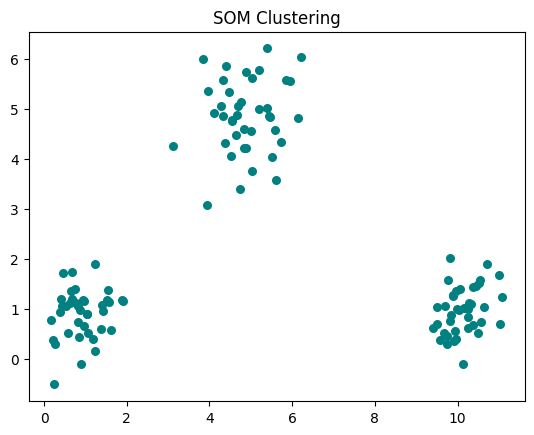

In [17]:
plt.scatter(points[:, 0], points[:, 1], marker='o', s=30, c='teal')
plt.title(f'SOM Clustering')

In [19]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, learning_rate=0.01, num_iterations=1000):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0

    for i in range(num_iterations):
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)

        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        db = (1 / m) * np.sum(y_pred - y)

        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

def predict(X, weights, bias, threshold=0.5):
    z = np.dot(X, weights) + bias
    y_pred_prob = sigmoid(z)
    y_pred = np.where(y_pred_prob >= threshold, 1, 0)
    return y_pred

# Example usage
X = np.array([
    [1, 10],
    [2, 20],
    [3, 30],
    [4, 40],
    [5, 50],
    [6, 60],
    [7, 70],
    [8, 80],
    [9, 90],
    [10, 100]
])

y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

weights, bias = logistic_regression(X, y)
y_pred = predict(X, weights, bias)

print("Weights:", weights)
print("Bias:", bias)
print("Predictions:", y_pred)


Weights: [0.02059894 0.20598935]
Bias: -1.9626208155836542
Predictions: [1 1 1 1 1 1 1 1 1 1]
